In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("chat_data.csv", encoding='cp1252')  # or encoding='ISO-8859-1'

 Time Encounters

In [3]:
df.head(5)

,timestamp,sender,message,media,call_flag
0,07-01-2020 11:04,AR,See you,True,Yes
1,06-12-2019 01:12,mabel,Missed voice call,True,No
2,16-12-2019 07:45,mabel,What are you doing?,False,Yes
3,22-12-2019 05:20,AR,See you,True,Yes
4,03-02-2020 19:12,AR,hi,False,No


In [4]:
df['datetime'] = pd.to_datetime(df['timestamp'], dayfirst=True)  # Replace with your actual column name

most_active_date = df['datetime'].dt.date.value_counts().idxmax()
most_active_day = df['datetime'].dt.day_name().value_counts().idxmax()
most_active_hour = df['datetime'].dt.hour.mode()[0]

avg_messages_per_day = df.groupby(df['datetime'].dt.date).size().mean()


In [5]:
print("📅 Time Encounters:")
print(f"• Most Active Date: {most_active_date}")
print(f"• Most Active Day: {most_active_day}")
print(f"• Most Active Hour: {most_active_hour}")
print(f"• Average Number of Messages per Day: {avg_messages_per_day}")

📅 Time Encounters:
• Most Active Date: 2020-02-04
• Most Active Day: Sunday
• Most Active Hour: 18
• Average Number of Messages per Day: 3.125


 Flirt Encounters (NLP-Based)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

flirt_words = ['love', 'cute', 'baby', 'sweet', 'darling']
vectorizer = CountVectorizer(vocabulary=flirt_words, lowercase=True)

flirt_matrix = vectorizer.fit_transform(df['message'].astype(str))
df['flirt_score'] = flirt_matrix.sum(axis=1)

flirt_by_person = df.groupby('sender')['flirt_score'].sum()
most_flirty = flirt_by_person.idxmax()
least_flirty = flirt_by_person.idxmin()


In [7]:
print("Flirt Encounters:")
print(f"• flirt_person: {flirt_by_person}")
print(f"• Most_flirty: {most_flirty}")
print(f"• Most_flirty: {least_flirty}")
print(f"• Average Number of Messages per Day: {avg_messages_per_day}")

Flirt Encounters:
• flirt_person: sender
AR       15
mabel    14
Name: flirt_score, dtype: int64
• Most_flirty: AR
• Most_flirty: mabel
• Average Number of Messages per Day: 3.125


Media Encounters

In [8]:
media_count = df['message'].str.contains('<Media omitted>').sum()
deleted_count = df['message'].str.contains('This message was deleted').sum()
missed_voice = df['message'].str.contains('Missed voice call').sum()
missed_video = df['message'].str.contains('Missed video call').sum()


In [9]:
print("Media Encounters:")
print(f"• media_count: {media_count}")
print(f"• deleted: {deleted_count}")
print(f"• voice_missed: {missed_voice}")
print(f"• Avideo_missed: {missed_video}")

Media Encounters:
• media_count: 12
• deleted: 0
• voice_missed: 5
• Avideo_missed: 5


Visualization

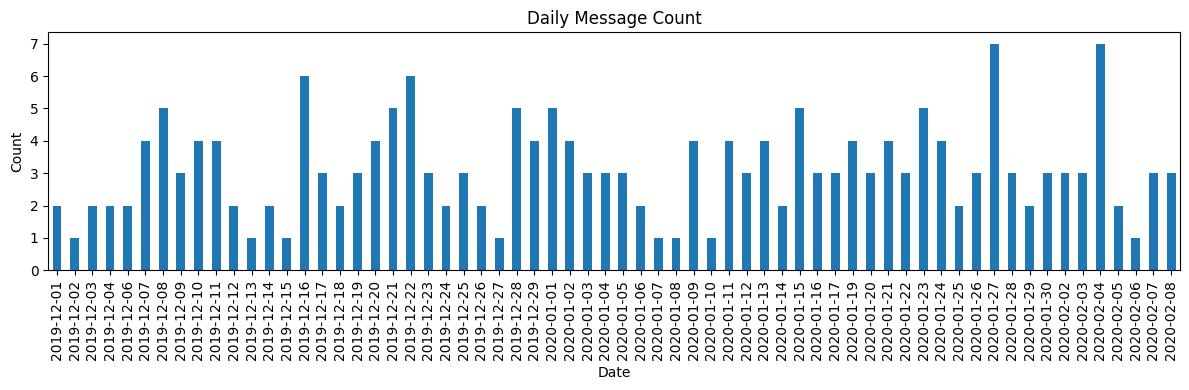

In [10]:
import matplotlib.pyplot as plt

daily_msg_counts = df.groupby(df['datetime'].dt.date).size()

daily_msg_counts.plot(kind='bar', figsize=(12, 4))
plt.title("Daily Message Count")
plt.ylabel("Count")
plt.xlabel("Date")
plt.tight_layout()
plt.show()
